<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU55_Modelo agregado de estimación del gasto medio por turista
¶</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>09.2.- Data Cleansing - Missing</font>

<font color='steelblue'>Data Cleaning refers to identifying and correcting (or removing) errors in the dataset that may negatively impact a predictive model, replacing, modifying, or deleting the dirty or coarse data.</font>

## <font color='steelblue'>Tasks</font>

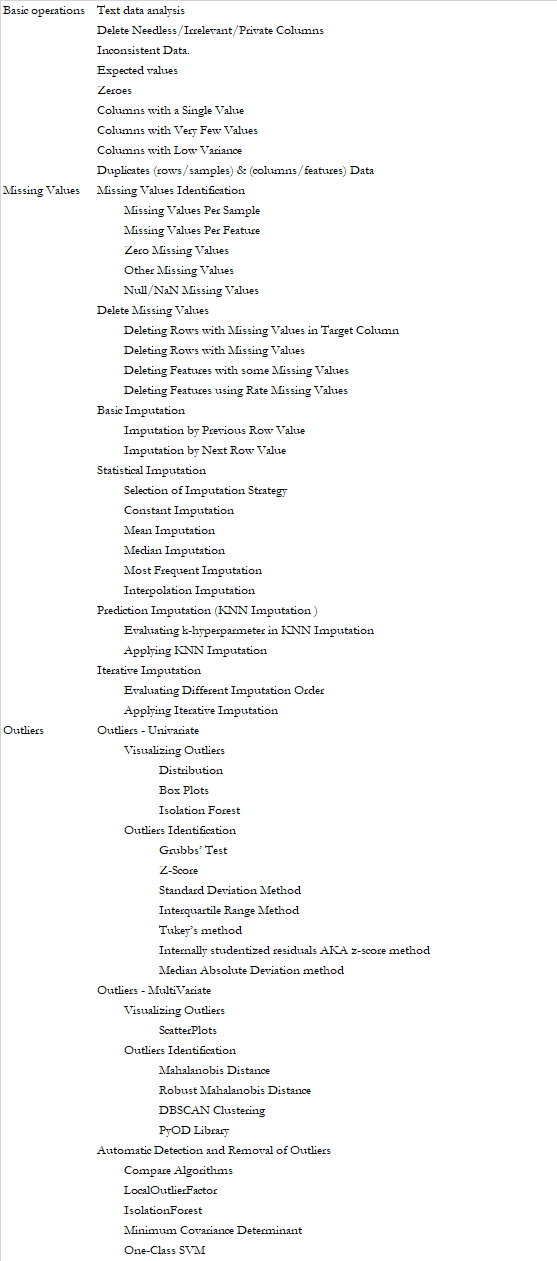


## Consideraciones casos CitizenLab programados en R

* La mayoría de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_55_06_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Input File: CU_55_07_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Output File: CU_55_09.2_03_gasto_municipio.csv</font>

## <font color='green'>Settings</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [56]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

### Libraries to use

In [57]:
library(readr)
library(dplyr)
library(sf)
library(tidyr)
library(stringr)

### Paths

In [58]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [59]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [60]:
iFile <- "CU_55_06_03_gasto_municipio.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_55_06_03_gasto_municipio.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [61]:
data <- read_csv(file_data)


Rows: 50294 Columns: 9
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): mes, pais_orig_cod, pais_orig, mun_dest, CMUN
dbl (4): mun_dest_cod, turistas, gasto, Target

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [62]:
data |> glimpse()

Rows: 50,294
Columns: 9
$ mes           <chr> "2019-07", "2019-07", "2019-07", "2019-07", "2019-07", "…
$ pais_orig_cod <chr> "000", "010", "011", "030", "110", "121", "123", "126", …
$ pais_orig     <chr> "Total", "Total Europa", "Total Unión Europea", "Total A…
$ mun_dest_cod  <dbl> 28002, 28002, 28002, 28002, 28002, 28002, 28002, 28002, …
$ mun_dest      <chr> "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "…
$ turistas      <dbl> 338, 290, 268, 37, 56, 54, 37, 40, 157, 116, 109, 8461, …
$ CMUN          <chr> "002", "002", "002", "002", "002", "002", "002", "002", …
$ gasto         <dbl> 86.78, 86.78, 86.78, 86.78, 76.36, 78.92, 93.65, 102.04,…
$ Target        <dbl> 86.78, 86.78, 86.78, 86.78, 76.36, 78.92, 93.65, 102.04,…


Muestra de los primeros datos:

In [63]:
data |> slice_head(n = 5)

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,gasto,Target
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
2019-07,000,Total,28002,Ajalvir,338,002,86.78,86.78
2019-07,010,Total Europa,28002,Ajalvir,290,002,86.78,86.78
2019-07,011,Total Unión Europea,28002,Ajalvir,268,002,86.78,86.78
2019-07,030,Total América,28002,Ajalvir,37,002,86.78,86.78
2019-07,110,Francia,28002,Ajalvir,56,002,76.36,76.36


## Missing Values

### Missing Values Identification

#### Missing Values Per Sample

In [64]:
# Create a dataframe with ID and number of missing values per sample
missing_per_sample_df <- data.frame(ID = 1:nrow(data), NAs = rowSums(is.na(data)))
# Filter rows with more than one missing value
filtered_missing_per_sample_df <-missing_per_sample_df[missing_per_sample_df$NAs > 1, ]
# Print the filtered dataframe
print(filtered_missing_per_sample_df)

[1] ID  NAs
<0 rows> (or 0-length row.names)


#### Missing Values Per Feature

In [65]:
# Calculate the number of missing values per feature
missing_per_feature <- colSums(is.na(data))
# Print the number of missing values per feature
print(missing_per_feature)

          mes pais_orig_cod     pais_orig  mun_dest_cod      mun_dest 
            0             0             0             0             0 
     turistas          CMUN         gasto        Target 
            0             0             0             0 


#### Zero Missing Values

In [66]:
# Detecting columns with minimum value of zero (0).
# Calculate the frequency of zeros in each column
zero_counts <- sapply(data, function(x) sum(x == 0, na.rm = TRUE))
# Calculate the proportion of zeros in each column
zero_proportions <- zero_counts / nrow(data)
# Set a threshold for the proportion of zeros
zero_threshold <- 0.9 # Adjust as needed
# Identify columns with a high proportion of zeros
columns_with_high_zeros <- names(zero_proportions[zero_proportions >=zero_threshold])
# Print the columns with a high proportion of zeros
print(columns_with_high_zeros)

character(0)


<font color='tomato'>Select column to replace</font>

In [67]:
# Select column to replace


<font color='darkgrey'><b>Operation</font>

In [68]:
# Replace zero missing values by nan
# Replace columns with a high proportion of zeros with NaN
data[, columns_with_high_zeros] <- NA

#### Delete Missing Values

Esta acción no aplica ya que no se han encontrado ningún valor faltante en los datos

### Deleting Rows with Missing Values in Target Column

In [69]:
# data <- data[!is.na(data$Target), ]


### Deleting Rows with Missing Values Only in case of high data size

In [70]:
# Eliminamos las filas con valores nulos
# data <- data[complete.cases(data), ]


### Deleting Features with some Missing Values 
Only with many features and for non-relevant features

In [71]:
# # Selecciono las columnas con algún valor missing:
# # Identify columns with any missing values
# cols_with_na <- sapply(data, function(x) any(is.na(x)))
# # Keep only those columns that do not have missing values
# data <- data[, !cols_with_na]

#### Deleting Features with some Missing Values
Only with many features and for non-relevant features

### Basic Imputation

Esta acción no aplica ya que no se han encontrado ningún valor faltante en los datos.

#### Imputation by Previous Row Value

In [72]:
# Sustituimos valores null por otro valor: VALOR FILA ANTERIOR
# # data <- data %>% fill(everything(), .direction = "down")

#### Imputation by Next Row Value

In [73]:
# Sustituimos valores null por otro valor: VALOR FILA SIGUIENTE
# data <- data %>% fill(everything(), .direction = "up")

### Statistical Imputation

A popular approach for data imputation is to calculate a statistical value for each column (such as a mean) and replace all missing values for that column with the 
statistic.

#### Selection of Imputation Strategy

In [74]:
# The mean accuracy of each approach can then be compared.
#
# Specific results may vary given the stochastic nature of 
# the learning algorithm, the evaluation procedure, or 
# differences in numerical precision. Consider running the 
# example a few times and compare the average performance.
#


In [75]:
# Plot model performance for comparison
# box and whisker plot is created for each set of results, 
# allowing the distribution of results to be compared.


#### Constant Imputation

<font color='tomato'>Select constant value</font>

In [76]:
# Select constant value
# constant = 0

<font color='darkgrey'><b>Operation</font>

In [77]:
# # Constant imputation
# data <- replace_na(data, list(everything() <- constant))

#### Mean Imputation

In [78]:
# # Identify numeric columns
# numeric_cols <- sapply(data, is.numeric)
# # Apply mean imputation only on numeric columns
# data_imputed <- data
# for(column in names(data)[numeric_cols]) {
# data_imputed[is.na(data_imputed[,column]), column] <- mean(data[,column],na.rm = TRUE)
# }

In [79]:
# Sustituyo


#### Median Imputation

In [80]:
# # Identify numeric columns
# numeric_cols <- sapply(data, is.numeric)
# # Apply median imputation only on numeric columns
# data_imputed <- data
# for(column in names(data)[numeric_cols]) {
# data_imputed[is.na(data_imputed[,column]), column] <-median(data[,column], na.rm = TRUE)
# }

In [81]:
# Sustituyo


#### Most Frequent Imputation

In [82]:
# # Create a function to calculate the mode
# getmode <- function(v) {
# uniqv <- unique(v)
# uniqv[which.max(tabulate(match(v, uniqv)))]
# }
# # Apply most frequent imputation to each column
# data_imputed <- data
# for(column in names(data)) {
# data_imputed[is.na(data_imputed[,column]), column] <-getmode(data[,column])
# }



In [83]:
# Sustituyo


#### Interpolation Imputation

In [84]:
# # If not already installed, install the zoo package
# if(!require(zoo)) install.packages('zoo')
# # Load the zoo package
# library(zoo)
# # Choose an interpolation method
# interpolation_method <- "linear" # "linear" or "spline"
# # Apply interpolation imputation
# data_imputed <- data
# if(interpolation_method == "linear") {
# data_imputed <- na.approx(data_imputed, na.rm = FALSE)
# } else if(interpolation_method == "spline") {
# data_imputed <- na.spline(data_imputed, na.rm = FALSE)
# } else {
# stop("Invalid interpolation method")
# }


### Prediction Imputation (KNN Imputation )
An approach to missing data imputation is to use a model to predict the missing values. Esta acción no aplica ya que no se han encontrado ningún valor faltante en los datos.

#### Evaluating k-hyperparmeter in KNN Imputation

<font color='tomato'>Select numbers of neighbors to evaluate</font>

In [85]:
# Numbers of neighbors to evaluate
# # Numbers of neighbors to evaluate
# k_values <- c(3, 5, 7, 9, 11)

<font color='darkgrey'><b>Operation</font>

In [86]:
# # If not already installed, install the VIM package
# if(!require(VIM)) install.packages('VIM')
# # Load the VIM package
# library(VIM)
# # Cross-validation
# cv_errors <- sapply(k_values, function(k) {
# # Apply KNN imputation
# data_imputed <- kNN(data, k = k)
# # Calculate and return the mean squared error
# mean((data - data_imputed)^2, na.rm = TRUE)
# })
# # Print the cross-validation errors
# print(cv_errors)

#### Applying KNN Imputation 

<font color='tomato'>Select numbers of neighbors to evaluate</font>

In [87]:
# Number of neighbors
# optimal_k <- k_values[which.min(cv_errors)]

<font color='darkgrey'><b>Operation</font>

In [88]:
# data_imputed <- kNN(data, k = optimal_k)

In [89]:
# Generating de new Data dataframe


### Iterative Imputation 

#### Evaluating Different Imputation Order
We can experiment with different imputation order strategies, such as descending, right-to-left (Arabic), left-to-right (Roman), and random.

In [90]:
# # If not already installed, install the mice package
# if(!require(mice)) install.packages('mice')
# # Load the mice package
# library(mice)
# # Determine the percentage of missing values in each column
# missing_values <- sapply(data, function(x) sum(is.na(x))/length(x))
# # Order the variables based on the percentage of missing values
# ascending_order <- order(missing_values)
# descending_order <- order(missing_values, decreasing = TRUE)
# random_order <- sample(length(missing_values))
# # Print the imputation orders
# print(ascending_order)
# print(descending_order)
# print(random_order)

#### Applying Iterative Imputation

<font color='tomato'>Select strategie</font>

In [91]:
# # Choose an imputation order strategy
# imputation_order <- ascending_order # or descending_order, or random_order

<font color='darkgrey'><b>Operation</font>

In [92]:
# # Perform iterative imputation
# mice_output <- mice(data[, imputation_order], m = 5, maxit = 50, method ='pmm', seed = 500)
# # Get the imputed data
# data_imputed <- complete(mice_output, 1)

In [93]:
# Generating the new Data dataframe


## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [94]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 09.2

In [95]:
caso <- "CU_55"
proceso <- '_09.2'
tarea <- "_03"
archivo <- ""
proper <- "_gasto_municipio"
extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [96]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [97]:
file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
path_out <- paste0(oPath, file_save)
write_csv(data_to_save, path_out)

cat('File saved as: ')
path_out

File saved as: 

[1] "Data/Output/CU_55_09.2_03_gasto_municipio.csv"

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [98]:
path_in <- paste0(iPath, file_save)
file.copy(path_out, path_in, overwrite = TRUE)

[1] TRUE

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Si eran necesarias se han realizado en el proceso 05 por cuestiones de eficiencia

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos están limpios para el despliegue


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>